In [1]:
import json
import glob
import pandas as pd
import os
import seaborn as sns
import numpy as np
import csv
from sklearn.preprocessing import LabelEncoder
import zipfile
import json
from PIL import Image, ImageDraw
import cv2
import random

# matplotlib에서 한글 폰트를 설정하는 방법
import matplotlib.pyplot as plt
plt.rc("font", family="malgun gothic")

# 음수 기호 출력 방법
import matplotlib
matplotlib.rcParams["axes.unicode_minus"]=False

# 그래프를 선명하게 출력하는 방법
%config InlineBackend.figure_format = "retina"

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('./data/data_taco/meta_df.csv', encoding='cp949')
df

,img_id,img_width,img_height,img_file,cat_id,cat_name,supercategory,ann_id,x,y,width,height,area
0,0,1537,2049,batch_1/000006.jpg,6,Glass bottle,Bottle,1,517.0000,127.0000,447.0000,1322.0,4.039540e+05
1,1,1537,2049,batch_1/000008.jpg,18,Meal carton,Carton,2,1.0000,457.0000,1429.0000,1519.0,1.071260e+06
2,1,1537,2049,batch_1/000008.jpg,14,Other carton,Carton,3,531.0000,292.0000,1006.0000,672.0,9.958350e+04
3,2,1537,2049,batch_1/000010.jpg,5,Clear plastic bottle,Bottle,4,632.0000,987.0000,500.0000,374.0,7.383250e+04
4,2,1537,2049,batch_1/000010.jpg,7,Plastic bottle cap,Bottle cap,5,632.0000,989.0000,44.0000,51.0,9.150000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,1498,1824,4000,batch_9/000098.jpg,16,Drink carton,Carton,4779,228.7143,1550.0476,1007.9999,579.0,5.032469e+05
4780,1498,1824,4000,batch_9/000098.jpg,7,Plastic bottle cap,Bottle cap,4780,1041.3334,1721.7142,141.0000,138.0,1.449450e+04
4781,1499,1824,4000,batch_9/000099.jpg,39,Other plastic wrapper,Plastic bag & wrapper,4781,862.0274,1331.2500,505.9726,612.5,1.549541e+05
4782,1499,1824,4000,batch_9/000099.jpg,14,Other carton,Carton,4782,966.0000,1996.0000,211.0000,336.0,2.867500e+04


In [3]:
df.info() # 결측치 없음   (x : 객체 위치 x 시작점, y: 객체 위치 y 시작점)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4784 entries, 0 to 4783
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   img_id         4784 non-null   int64  
 1   img_width      4784 non-null   int64  
 2   img_height     4784 non-null   int64  
 3   img_file       4784 non-null   object 
 4   cat_id         4784 non-null   int64  
 5   cat_name       4784 non-null   object 
 6   supercategory  4784 non-null   object 
 7   ann_id         4784 non-null   int64  
 8   x              4784 non-null   float64
 9   y              4784 non-null   float64
 10  width          4784 non-null   float64
 11  height         4784 non-null   float64
 12  area           4784 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 486.0+ KB


In [4]:
df.describe()

,img_id,img_width,img_height,cat_id,ann_id,x,y,width,height,area
count,4784.000000,4784.000000,4784.000000,4784.000000,4784.000000,4784.000000,4784.000000,4784.000000,4784.000000,4.784000e+03
mean,756.936037,2794.278428,3234.358278,34.079013,2391.949833,1232.285117,1485.067894,331.434419,320.246833,1.504072e+05
std,445.884396,714.851079,837.244672,20.081707,1381.264283,703.739763,826.005410,440.431739,442.046602,4.850848e+05
min,0.000000,842.000000,474.000000,0.000000,1.000000,-1.000000,-1.316667,10.000000,4.000000,5.550000e+01
25%,354.750000,2448.000000,2448.000000,12.000000,1195.750000,741.600000,892.750000,68.000000,62.000000,2.142000e+03
50%,743.000000,2448.000000,3264.000000,36.000000,2392.500000,1150.000000,1414.000000,179.500000,159.000000,1.424475e+04
75%,1154.000000,3264.000000,4000.000000,57.000000,3588.250000,1612.000000,1961.250000,405.250000,387.000000,7.533312e+04
max,1499.000000,6000.000000,5312.000000,59.000000,4783.000000,5573.000000,5208.000000,3758.000000,3995.000000,7.328036e+06


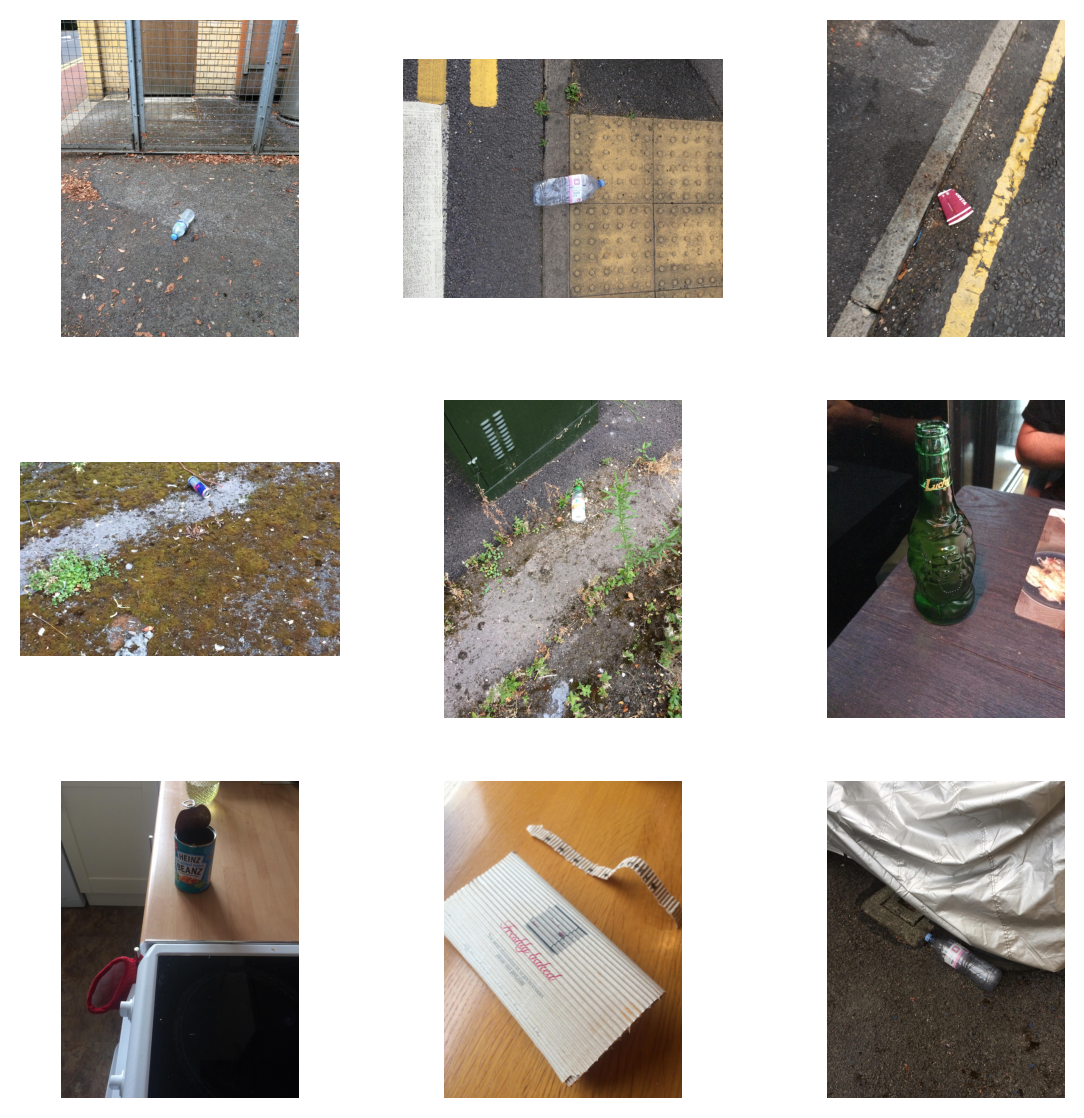

In [5]:
images = glob.glob('./data/data_taco/*/*.jpg') # 랜덤으로 이미지 출력

plt.figure(figsize=(7, 7))
for i in range(9):    
    ax = plt.subplot(3, 3, i + 1)
    img_test = Image.open(images[i])    
    plt.imshow(img_test)        
    plt.axis("off")
plt.show()

In [6]:
df['supercategory'].unique() # 분류기준  aihub에 맞추기 전 확인

array(['Bottle', 'Carton', 'Bottle cap', 'Can', 'Pop tab', 'Cup',
       'Plastic bag & wrapper', 'Styrofoam piece', 'Other plastic',
       'Plastic container', 'Paper', 'Cigarette', 'Lid', 'Straw',
       'Paper bag', 'Broken glass', 'Plastic utensils', 'Glass jar',
       'Food waste', 'Squeezable tube', 'Shoe', 'Aluminium foil',
       'Unlabeled litter', 'Blister pack', 'Battery', 'Rope & strings',
       'Scrap metal', 'Plastic glooves'], dtype=object)

In [7]:
# 분류기준에 없거나, 분류가 어려운 리스트 삭제
drop_list = ['Cup', 'Cigarette', 'Lid', 'Straw' , 'Food waste', 'Squeezable tube' , 'Aluminium foil' , 'Unlabeled litter' , 'Blister pack' , 'Battery' , 'Rope & strings' , 'Scrap metal' , 'Plastic glooves', 'Other plastic']

for i in drop_list:
    df= df[df.supercategory != i]

In [8]:
df['supercategory'].unique()  # 남은 항목 확인

array(['Bottle', 'Carton', 'Bottle cap', 'Can', 'Pop tab',
       'Plastic bag & wrapper', 'Styrofoam piece', 'Plastic container',
       'Paper', 'Paper bag', 'Broken glass', 'Plastic utensils',
       'Glass jar', 'Shoe'], dtype=object)

In [9]:
dic = {'Bottle' : '페트병류', 'Carton' : '종이류', 'Bottle cap' : '플라스틱류', 'Can' : '캔류', 'Pop tab' : '캔류',
       'Plastic bag & wrapper' : '비닐류', 'Styrofoam piece' : '스티로폼류', 'Other plastic' : '플라스틱류',
       'Plastic container': '플라스틱류', 'Paper': '종이류', 'Paper bag': '종이류', 'Broken glass' : '유리병류',
       'Plastic utensils': '플라스틱류', 'Glass jar':'유리병류', 'Shoe': '의류'}

df['supercategory'] = df['supercategory'].apply(lambda x : x.replace(x, dic[x])) 

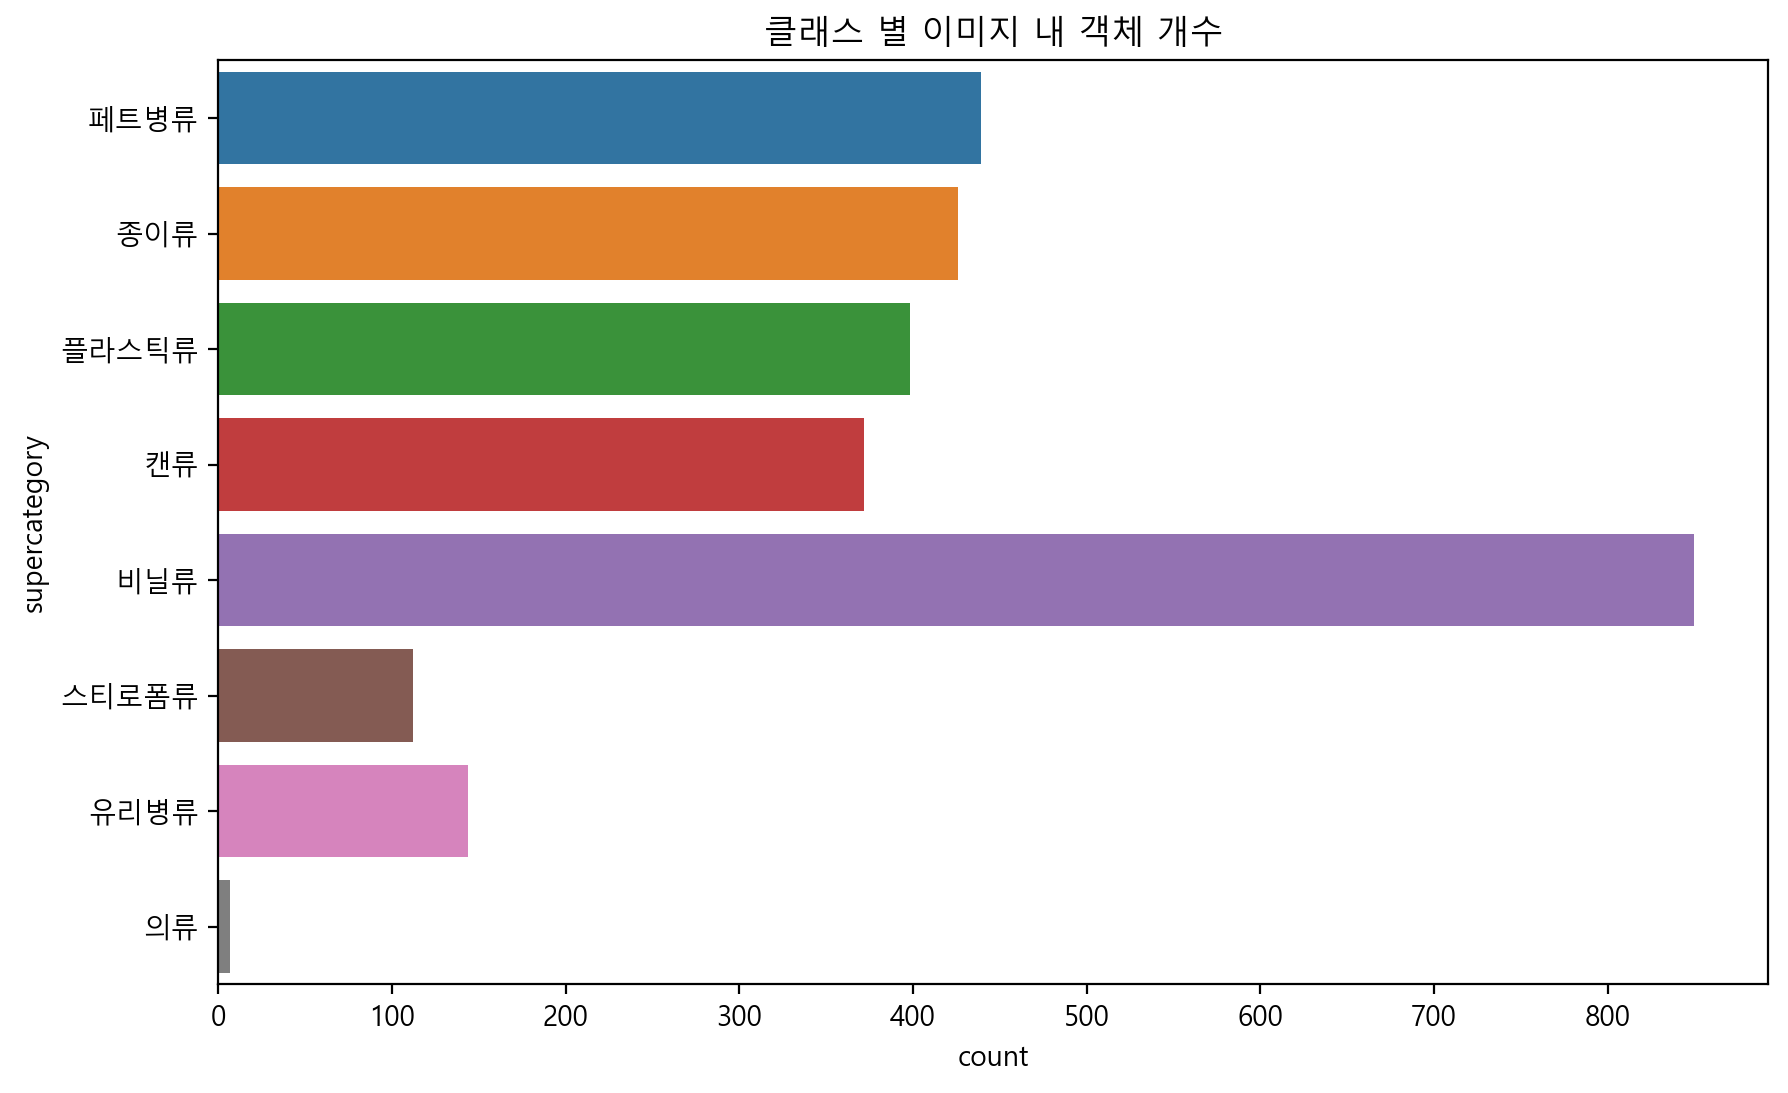

In [10]:
plt.figure(figsize=(10, 6))
plt.title('클래스 별 이미지 내 객체 개수', fontname ='malgun gothic')
sns.countplot(y='supercategory', data=df);

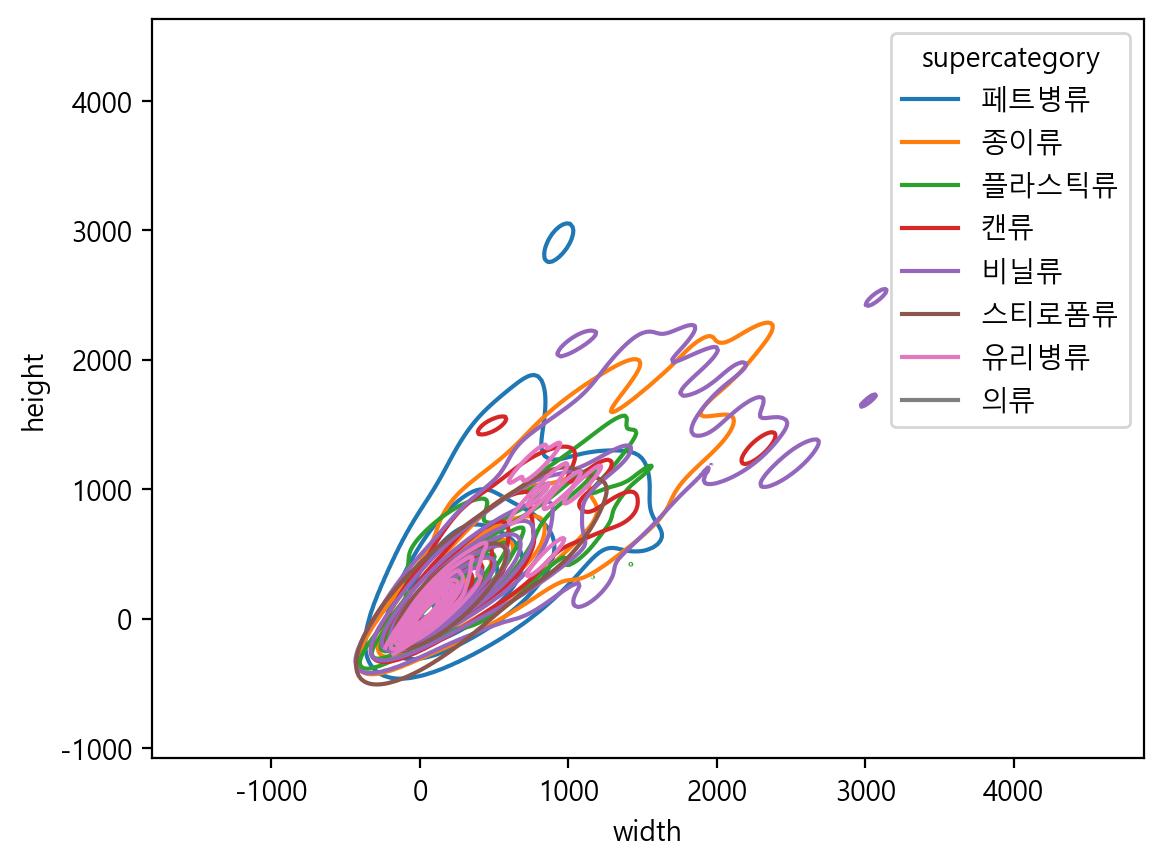

In [11]:
sns.kdeplot(data=df, x='width', y="height", hue="supercategory"); # 클래스 별 객체의 가로, 세로길이 분포    

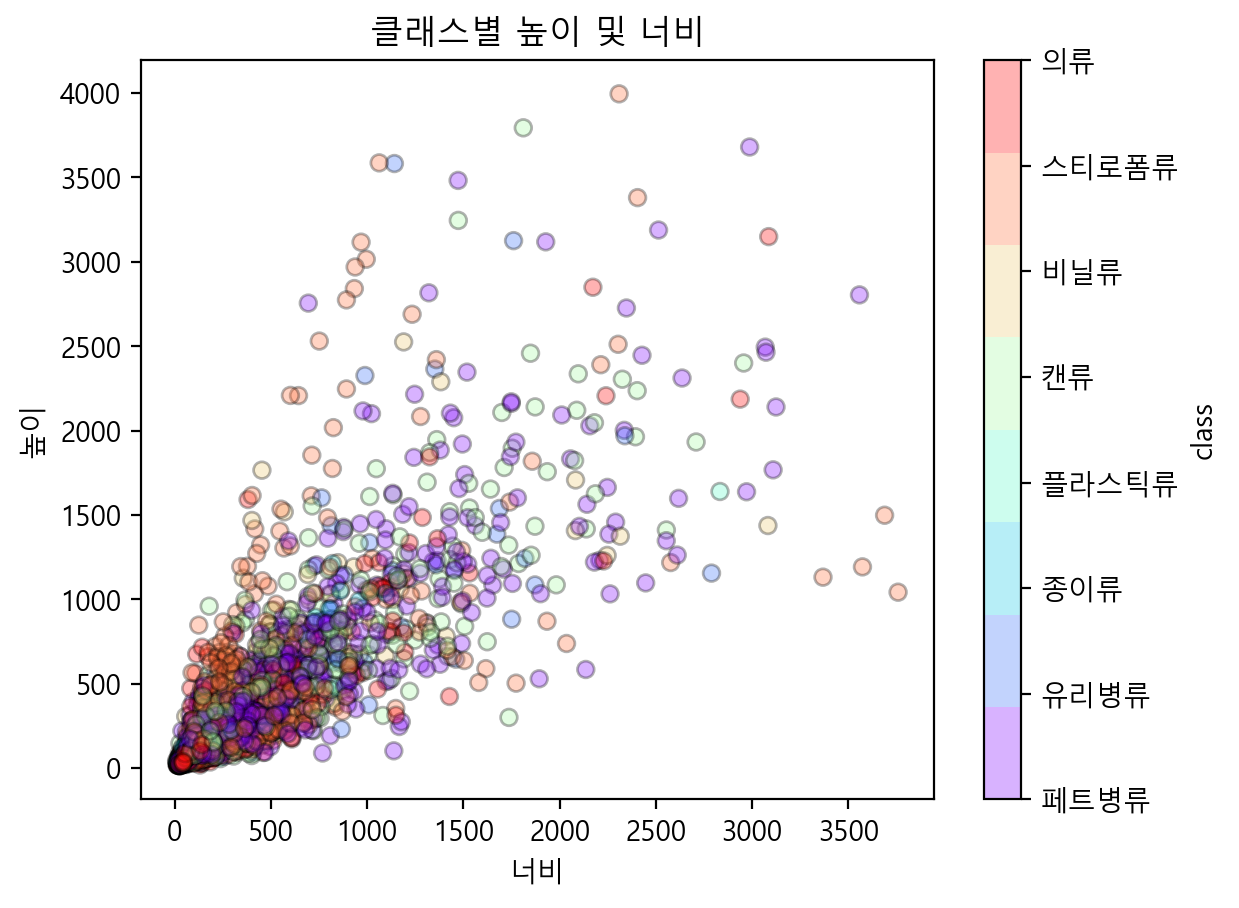

In [12]:
plt.scatter(df['width'], df['height'],alpha=0.3,edgecolors='black', c=df['supercategory'].astype('category').cat.codes, cmap=plt.cm.get_cmap('rainbow', len(df['supercategory'].unique())))
plt.title('클래스별 높이 및 너비', fontname ='malgun gothic')
plt.xlabel('너비', fontname ='malgun gothic')
plt.ylabel('높이', fontname ='malgun gothic')
cb=plt.colorbar(ticks=range(8), label='class')
cb.set_ticklabels(['페트병류', '유리병류', '종이류','플라스틱류','캔류','비닐류','스티로폼류','의류'], fontname ='malgun gothic')
plt.show()

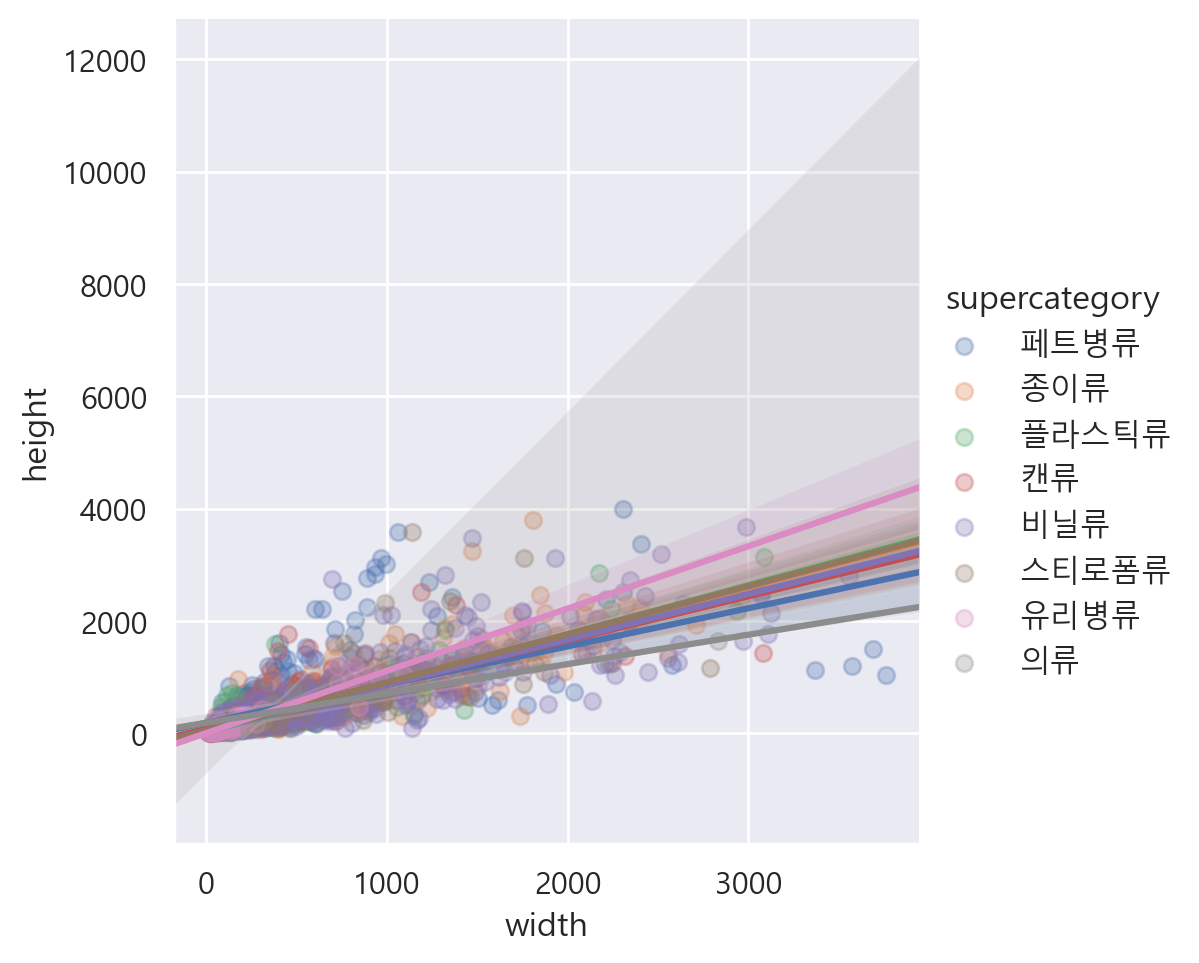

In [13]:
sns.set(font="malgun gothic") # 선형관계 확인 : 특별한 건 없다
sns.lmplot(x='width', y='height', hue = 'supercategory', data = df, scatter_kws = {'alpha': 0.3}, truncate=False)
plt.show()

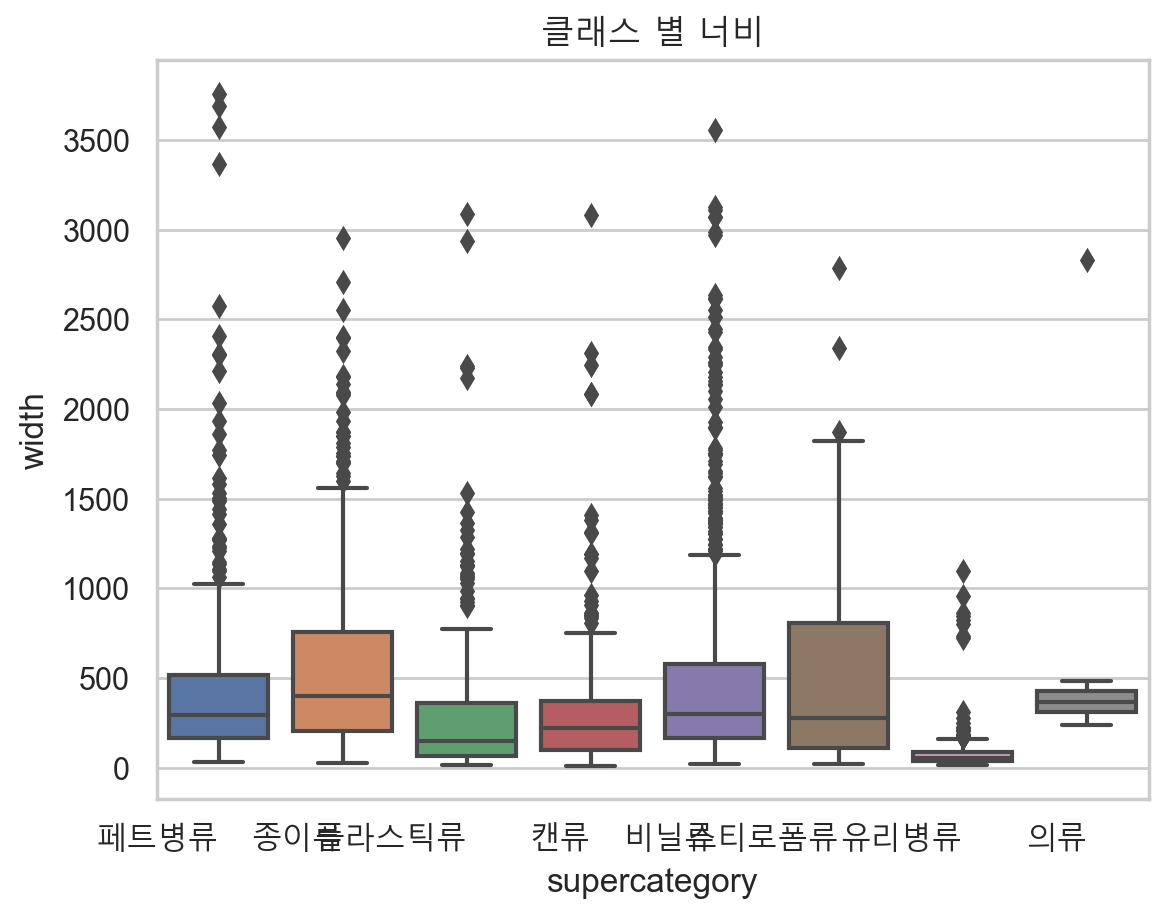

In [14]:
sns.set(style='whitegrid')
plt.xticks(rotation=45, ha = 'right', fontname ='malgun gothic')
plt.title('클래스 별 너비', fontname ='malgun gothic')
sns.boxplot(x="supercategory", y=df['width'], data=df);

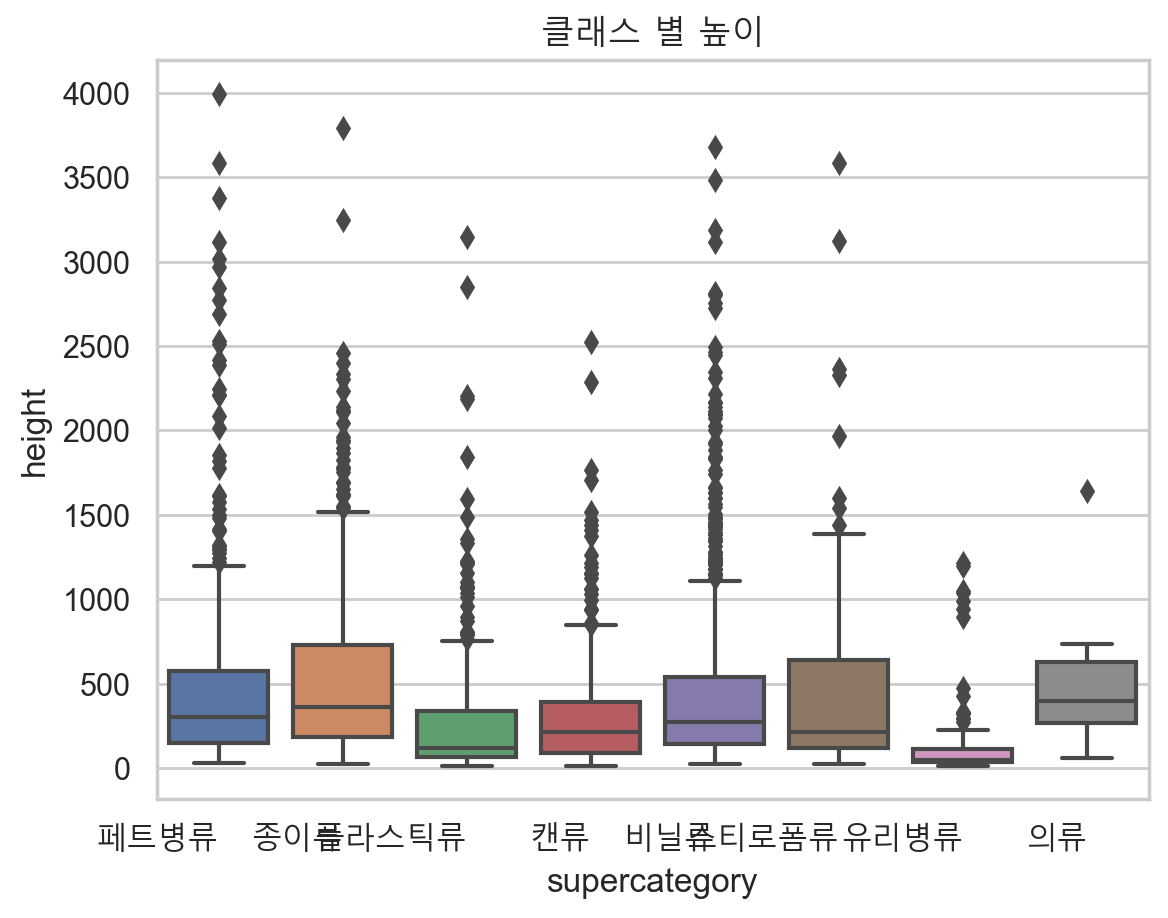

In [15]:
sns.set(style='whitegrid')
plt.xticks(rotation=45, ha = 'right', fontname ='malgun gothic')
plt.title('클래스 별 높이', fontname ='malgun gothic')
sns.boxplot(x="supercategory", y=df['height'], data=df);

In [16]:
df[df['width'] > 3600 ]

,img_id,img_width,img_height,img_file,cat_id,cat_name,supercategory,ann_id,x,y,width,height,area
1645,468,4160,3120,batch_13/000067.jpg,6,Glass bottle,페트병류,1645,395.0,1032.0,3758.0,1042.0,3044175.0
1689,494,4160,3120,batch_13/000093.jpg,5,Clear plastic bottle,페트병류,1689,40.0,450.0,3688.0,1498.0,4376761.0


In [17]:
img = Image.open('./data/data_taco/batch_13/000067.jpg').convert('RGB')

draw = ImageDraw.Draw(img)
draw.rectangle((395,1032,4153,2074), outline=(0,255,0), width = 3)

img.show()

In [18]:
img = Image.open('./data/data_taco/batch_13/000093.jpg').convert('RGB')

draw = ImageDraw.Draw(img)
draw.rectangle((40,450,3728,1948), outline=(0,255,0), width = 3)

img.show()

In [19]:
df[df['height'] > 3800 ]

,img_id,img_width,img_height,img_file,cat_id,cat_name,supercategory,ann_id,x,y,width,height,area
1727,520,3120,4160,batch_14/000019.jpg,5,Clear plastic bottle,페트병류,1727,327.0,81.0,2309.0,3995.0,4087485.0


In [20]:
img = Image.open('./data/data_taco/batch_14/000019.jpg').convert('RGB')

draw = ImageDraw.Draw(img)
draw.rectangle((327,81,2636,4076), outline=(0,255,0), width = 3)

img.show()

In [21]:
df

,img_id,img_width,img_height,img_file,cat_id,cat_name,supercategory,ann_id,x,y,width,height,area
0,0,1537,2049,batch_1/000006.jpg,6,Glass bottle,페트병류,1,517.0000,127.0000,447.0000,1322.0,4.039540e+05
1,1,1537,2049,batch_1/000008.jpg,18,Meal carton,종이류,2,1.0000,457.0000,1429.0000,1519.0,1.071260e+06
2,1,1537,2049,batch_1/000008.jpg,14,Other carton,종이류,3,531.0000,292.0000,1006.0000,672.0,9.958350e+04
3,2,1537,2049,batch_1/000010.jpg,5,Clear plastic bottle,페트병류,4,632.0000,987.0000,500.0000,374.0,7.383250e+04
4,2,1537,2049,batch_1/000010.jpg,7,Plastic bottle cap,플라스틱류,5,632.0000,989.0000,44.0000,51.0,9.150000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,1498,1824,4000,batch_9/000098.jpg,16,Drink carton,종이류,4779,228.7143,1550.0476,1007.9999,579.0,5.032469e+05
4780,1498,1824,4000,batch_9/000098.jpg,7,Plastic bottle cap,플라스틱류,4780,1041.3334,1721.7142,141.0000,138.0,1.449450e+04
4781,1499,1824,4000,batch_9/000099.jpg,39,Other plastic wrapper,비닐류,4781,862.0274,1331.2500,505.9726,612.5,1.549541e+05
4782,1499,1824,4000,batch_9/000099.jpg,14,Other carton,종이류,4782,966.0000,1996.0000,211.0000,336.0,2.867500e+04


In [22]:
df['x_'] = (df['width']+df['x'])/df['img_width'] # yolo용 좌표 x
df['y_'] = (df['height']+df['y'])/df['img_height'] # yolo용 좌표 y
df['box_x'] = (df['width']-df['x'])/df['img_width'] # yolo용 좌표 x
df['box_y'] = (df['height']-df['y'])/df['img_height'] # yolo용 좌표 y

drop_list = ['img_id','img_width','img_height','cat_id','ann_id' ,'cat_name','x','y','width','height','area'] 
df = df.drop(drop_list,axis=1)# 필요없는 칼럼 삭제

df = df.reset_index(drop=True) #인덱스 재설정
df

,img_file,supercategory,x_,y_,box_x,box_y
0,batch_1/000006.jpg,페트병류,0.627196,0.707174,-0.045543,0.583211
1,batch_1/000008.jpg,종이류,0.930384,0.964373,0.929083,0.518302
2,batch_1/000008.jpg,종이류,1.000000,0.470473,0.309044,0.185456
3,batch_1/000010.jpg,페트병류,0.736500,0.664226,-0.085882,-0.299170
4,batch_1/000010.jpg,플라스틱류,0.439818,0.507565,-0.382563,-0.457784
...,...,...,...,...,...,...
2743,batch_9/000098.jpg,종이류,0.678023,0.532262,0.427240,-0.242762
2744,batch_9/000098.jpg,플라스틱류,0.648209,0.464929,-0.493604,-0.395929
2745,batch_9/000099.jpg,비닐류,0.750000,0.485938,-0.195205,-0.179688
2746,batch_9/000099.jpg,종이류,0.645285,0.583000,-0.413925,-0.415000


In [23]:
df.rename(columns={'img_file' : 'file_name', 'supercategory':'label','x_':'x', 'y_':'y'}, inplace=True)

dic = {'비닐류': '4', '스티로폼류': '5', '유리병류': '6', '의류': '7',  '종이류': '10', '캔류': '11', '페트병류': '12', '플라스틱류': '13', '형광등': '14'}

df['label'] = df['label'].apply(lambda x : x.replace(x, dic[x]))
df['label'] = df['label'].astype(int)

df

,file_name,label,x,y,box_x,box_y
0,batch_1/000006.jpg,12,0.627196,0.707174,-0.045543,0.583211
1,batch_1/000008.jpg,10,0.930384,0.964373,0.929083,0.518302
2,batch_1/000008.jpg,10,1.000000,0.470473,0.309044,0.185456
3,batch_1/000010.jpg,12,0.736500,0.664226,-0.085882,-0.299170
4,batch_1/000010.jpg,13,0.439818,0.507565,-0.382563,-0.457784
...,...,...,...,...,...,...
2743,batch_9/000098.jpg,10,0.678023,0.532262,0.427240,-0.242762
2744,batch_9/000098.jpg,13,0.648209,0.464929,-0.493604,-0.395929
2745,batch_9/000099.jpg,4,0.750000,0.485938,-0.195205,-0.179688
2746,batch_9/000099.jpg,10,0.645285,0.583000,-0.413925,-0.415000


In [25]:
df.to_csv('./data/df_taco_eda.csv', header=True, index=False,encoding='ms949')